In [106]:
import utils
import utils.optm as optm
import utils.lossfunc as lf
import numpy as np
import torch
from importlib import reload

In [107]:
X = np.random.rand(16).reshape(4, 4)-0.5
X = X + X.T + np.eye(4)
def callbackF(x, f, context):
    print("target value : {:.5f} in the context {}".format(f,context))

In [108]:
reload(optm)
reload(lf)
# U = optm.unitary_solver([2, 2], syms = True, dtype=torch.float64)
func = optm.unitary_optm(X, N = 2, dtype=np.float64)
import scipy.optimize as optimize
# bounds = [[0, 20]] + [[0, np.pi] for _ in range(func.n_params-2)] + [[0, 2*np.pi]]
bounds = [[0, 2*np.pi]]
ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-5, visit = 2.7, initial_temp = 10**3, maxiter = 1000, callback = callbackF)

lps = 2, N = 2
target value : 0.02095 in the context 1
target value : -0.00000 in the context 0
target value : -0.00000 in the context 0
target value : -0.00000 in the context 0
target value : -0.00000 in the context 0
target value : -0.00000 in the context 0
target value : -0.00000 in the context 0


### Check periodicity

### 1 dimensional parameter

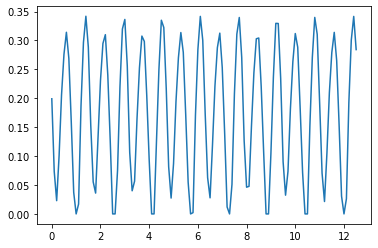

In [110]:
from matplotlib import pyplot as plt
t_list=np.arange(0, 4*np.pi, 0.1)
res = []
for t in t_list:
    res.append(func([t]))
fig, ax = plt.subplots()
ax.plot(t_list, res)
fig.show()

### 6-d parameter

lps = 4, N = 1


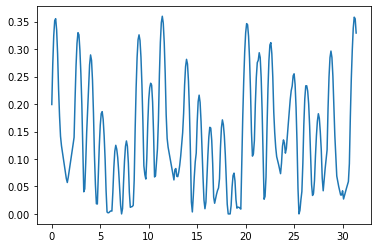

In [111]:
func = optm.unitary_optm(X,index = np.array([0]), N = 1, dtype=np.float64)
from matplotlib import pyplot as plt
t_list=np.arange(0, 10*np.pi, 0.1)
res = []
for t in t_list:
    res.append(func([t]))
#     print(np.linalg.norm(func.coord))
fig, ax = plt.subplots()
ax.plot(t_list, res)
fig.show()

In [112]:
np.linalg.det(func.matrix())

1.0000000000000027

In [77]:
# rranges = (slice(0, 4, 0.25),) * 6
# from scipy import optimize
# resbrute = optimize.brute(func, rranges, full_output=True,
#                               finish=optimize.fmin)